# 사인파 케라스로 구현
 - 저번에 텐서플로우로 하다가 실패해서 케라스로 다시 구현해봅니다. 텐서플로 버전 계속 고처보려했는데 못 고쳐서 이거나 해봤습니다.

In [1]:
import numpy as np

def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

T = 100
f = toy_problem(T) # t = 0, ... , 200일 때의 데이터 생성

In [2]:
length_of_sequences = 2 * T # 시계열 전체의 길이
maxlen = 25 # 하나의 시계열 데이터의 길이

data = []
target = []
for i in range(0, length_of_sequences - maxlen + 1): # 과거의 데이터 셋을 t - maxlen + 1 라 생각
    data.append(f[i:i + maxlen])
    target.append(f[i + maxlen])

In [3]:
# 데이터 차원 맞추기

X = np.array(data).reshape(len(data), maxlen, 1) # 데이터 수, maxlen, 입력차원(1)
Y = np.array(target).reshape(len(data), 1) # 출력차원은 1

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 학습데이터 준비

N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [10]:
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [6]:
def weight_variable(shape, dtype=None):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

In [7]:
n_in = len(X[0][0]) # 1
n_hidden = 20
n_out = len(Y[0]) # 1

model = Sequential()
model.add(SimpleRNN(n_hidden, init=weight_variable, input_shape=(maxlen, n_out)))
model.add(Dense(n_out, init=weight_variable))
model.add(Activation('linear'))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(20, input_shape=(25, 1), kernel_initializer=<function ...)`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer=<function ...)`
  import sys


In [8]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [14]:
epochs = 500
batch_size = 10

model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_data=(X_validation, Y_validation))

Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 4ms/step - loss: 0.5002 - val_loss: 0.3583
Epoch 2/500
158/158 [==============================] - 0s 437us/step - loss: 0.3994 - val_loss: 0.2597
Epoch 3/500
158/158 [==============================] - 0s 386us/step - loss: 0.2420 - val_loss: 0.1302
Epoch 4/500
158/158 [==============================] - 0s 418us/step - loss: 0.1095 - val_loss: 0.0695
Epoch 5/500
158/158 [==============================] - 0s 361us/step - loss: 0.0567 - val_loss: 0.0499
Epoch 6/500
158/158 [==============================] - 0s 367us/step - loss: 0.0484 - val_loss: 0.0458
Epoch 7/500
158/158 [==============================] - 0s 367us/step - loss: 0.0427 - val_loss: 0.0273
Epoch 8/500
158/158 [==============================] - 0s 443us/step - loss: 0.0387 - val_loss: 0.0253
Epoch 9/500
158/158 [==============================] - 0s 766us/step - loss: 0.0341 - val_loss: 0.0220
Epoch 10/500
158/158 [========

158/158 [==============================] - 0s 354us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 80/500
158/158 [==============================] - 0s 342us/step - loss: 0.0012 - val_loss: 0.0016
Epoch 81/500
158/158 [==============================] - 0s 361us/step - loss: 0.0011 - val_loss: 0.0015
Epoch 82/500
158/158 [==============================] - 0s 335us/step - loss: 0.0012 - val_loss: 0.0023
Epoch 83/500
158/158 [==============================] - 0s 361us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 84/500
158/158 [==============================] - 0s 373us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 85/500
158/158 [==============================] - 0s 405us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 86/500
158/158 [==============================] - 0s 354us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 87/500
158/158 [==============================] - 0s 348us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 88/500
158/158 [==============================] - 0s 335us/step - loss:

158/158 [==============================] - 0s 367us/step - loss: 0.0011 - val_loss: 0.0019
Epoch 158/500
158/158 [==============================] - 0s 380us/step - loss: 0.0012 - val_loss: 0.0026
Epoch 159/500
158/158 [==============================] - 0s 348us/step - loss: 0.0011 - val_loss: 0.0020
Epoch 160/500
158/158 [==============================] - 0s 367us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 161/500
158/158 [==============================] - 0s 342us/step - loss: 0.0015 - val_loss: 0.0028
Epoch 162/500
158/158 [==============================] - 0s 354us/step - loss: 0.0012 - val_loss: 0.0025
Epoch 163/500
158/158 [==============================] - 0s 373us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 164/500
158/158 [==============================] - 0s 342us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 165/500
158/158 [==============================] - 0s 335us/step - loss: 0.0012 - val_loss: 0.0018
Epoch 166/500
158/158 [==============================] - 0s 361us/ste

158/158 [==============================] - 0s 386us/step - loss: 0.0011 - val_loss: 0.0023
Epoch 236/500
158/158 [==============================] - 0s 361us/step - loss: 0.0012 - val_loss: 0.0023
Epoch 237/500
158/158 [==============================] - 0s 348us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 238/500
158/158 [==============================] - 0s 354us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 239/500
158/158 [==============================] - 0s 399us/step - loss: 0.0012 - val_loss: 0.0023
Epoch 240/500
158/158 [==============================] - 0s 348us/step - loss: 0.0012 - val_loss: 0.0016
Epoch 241/500
158/158 [==============================] - 0s 335us/step - loss: 0.0011 - val_loss: 0.0020
Epoch 242/500
158/158 [==============================] - 0s 373us/step - loss: 0.0011 - val_loss: 0.0017
Epoch 243/500
158/158 [==============================] - 0s 380us/step - loss: 0.0012 - val_loss: 0.0021
Epoch 244/500
158/158 [==============================] - 0s 354us/ste

158/158 [==============================] - 0s 430us/step - loss: 0.0012 - val_loss: 0.0023
Epoch 314/500
158/158 [==============================] - 0s 677us/step - loss: 0.0010 - val_loss: 0.0017
Epoch 315/500
158/158 [==============================] - 0s 373us/step - loss: 0.0011 - val_loss: 0.0024
Epoch 316/500
158/158 [==============================] - 0s 456us/step - loss: 0.0011 - val_loss: 0.0031
Epoch 317/500
158/158 [==============================] - 0s 456us/step - loss: 0.0012 - val_loss: 0.0020
Epoch 318/500
158/158 [==============================] - 0s 500us/step - loss: 0.0012 - val_loss: 0.0019
Epoch 319/500
158/158 [==============================] - 0s 399us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 320/500
158/158 [==============================] - 0s 437us/step - loss: 0.0011 - val_loss: 0.0017
Epoch 321/500
158/158 [==============================] - 0s 348us/step - loss: 0.0012 - val_loss: 0.0024
Epoch 322/500
158/158 [==============================] - 0s 437us/ste

158/158 [==============================] - 0s 519us/step - loss: 0.0012 - val_loss: 0.0022
Epoch 392/500
158/158 [==============================] - 0s 456us/step - loss: 0.0012 - val_loss: 0.0021
Epoch 393/500
158/158 [==============================] - 0s 456us/step - loss: 0.0010 - val_loss: 0.0019
Epoch 394/500
158/158 [==============================] - 0s 437us/step - loss: 0.0011 - val_loss: 0.0018
Epoch 395/500
158/158 [==============================] - 0s 424us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 396/500
158/158 [==============================] - 0s 513us/step - loss: 0.0011 - val_loss: 0.0029
Epoch 397/500
158/158 [==============================] - 0s 418us/step - loss: 0.0014 - val_loss: 0.0023
Epoch 398/500
158/158 [==============================] - 0s 475us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 399/500
158/158 [==============================] - 0s 380us/step - loss: 0.0013 - val_loss: 0.0019
Epoch 400/500
158/158 [==============================] - 0s 361us/ste

158/158 [==============================] - 0s 367us/step - loss: 0.0013 - val_loss: 0.0021
Epoch 470/500
158/158 [==============================] - 0s 462us/step - loss: 0.0014 - val_loss: 0.0023
Epoch 471/500
158/158 [==============================] - 0s 506us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 472/500
158/158 [==============================] - 0s 525us/step - loss: 0.0011 - val_loss: 0.0028
Epoch 473/500
158/158 [==============================] - 0s 506us/step - loss: 0.0011 - val_loss: 0.0019
Epoch 474/500
158/158 [==============================] - 0s 759us/step - loss: 0.0011 - val_loss: 0.0016
Epoch 475/500
158/158 [==============================] - 0s 563us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 476/500
158/158 [==============================] - 0s 456us/step - loss: 0.0010 - val_loss: 0.0018
Epoch 477/500
158/158 [==============================] - 0s 475us/step - loss: 0.0012 - val_loss: 0.0024
Epoch 478/500
158/158 [==============================] - 0s 424us/ste

In [17]:
truncated = maxlen
Z = X[:1]

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(length_of_sequences - maxlen + 1):
    z_ =  Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

In [18]:
import matplotlib.pyplot as plt

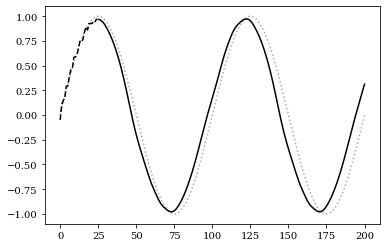

In [20]:
plt.rc('font', family='serif')
plt.figure()
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()

# 결과
 - 매우 흡족스럽니다. 근데 얼리 스탑핑 기법을 적용하려 했는데 이것도 자꾸 오류나서 그냥 뺏습니다. 굳이 없어도 막 이상하지는 않은 것 같습니다.